In [2]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
%matplotlib inline

# Check out the data

## Energy Datasets

- **Data** - o timestamp associado ao registo, ao dia;
- **Hora** - a hora associada ao registo;
- **Normal** (kWh) - quantidade de energia eléctrica consumida, em kWh e proveniente da rede eléctrica, num período considerado normal em ciclos bi-horário diários (horas fora de vazio);
- **Horário Económico (kWh)** - quantidade de energia eléctrica consumida, em kWh e proveniente da rede eléctrica, num período considerado económico em ciclos bi-horário diários (horas de vazio);
- **Autoconsumo (kWh)** - quantidade de energia eléctrica consumida, em kWh, proveniente dos painéis solares;
- **Injeção na rede (kWh)** - quantidade de energia eléctrica injectada na rede eléctrica, em kWh, proveniente dos painéis solares.

In [ ]:
en1 = pd.read_csv('./datasets/energia_202109-202112.csv')
en2 = pd.read_csv('./datasets/energia_202201-202212.csv')
en3 = pd.read_csv('./datasets/energia_202301-202304.csv')


# Merge the two dataframes
energyDatasets = pd.concat([en1, en2, en3])

energyDatasets.to_csv("combinedEnergy.csv", index=False)

## Meteorological Datasets

- **dt** - o timestamp associado ao registo;
- **dt_iso** - a data associada ao registo, ao segundo;
- **city_name** - o local em causa;
- **temp** - temperatura em ºC;
- **feels_like** - sensação térmica em ºC;
- **temp_min** - temperatura mínima sentida em ºC;
- **temp_max** - temperatura máxima sentida em ºC;
- **pressure** - pressão atmosférica sentida em atm;
- **sea_level** - pressão atmosférica sentida ao nível do mar em atm;
- **grnd_level** - pressão atmosférica sentida à altitude local em atm;
- **humidity** - humidade em percentagem;
- **wind_speed** - velocidade do vento em metros por segundo;
- **rain_1h** - valor médio de precipitação;
- **clouds_all** - nível de nebulosidade em percentagem;
- **weather_description** - avaliação qualitativa do estado do tempo.

In [3]:
meteo1 = pd.read_csv('./datasets/meteo_202109-202112.csv')
meteo2 = pd.read_csv('./datasets/meteo_202201-202212.csv')
meteo3 = pd.read_csv('./datasets/meteo_202301-202304.csv')


# Merge the two dataframes
meteoDatasets = pd.concat([meteo1, meteo2, meteo3])

meteoDatasets.to_csv("/datasets/combined/combinedMeteo.csv", index=False)

# Understand the information - meteo

In [4]:
meteoDatasets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13440 entries, 0 to 1751
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   13440 non-null  int64  
 1   dt_iso               13440 non-null  object 
 2   city_name            13440 non-null  object 
 3   temp                 13440 non-null  float64
 4   feels_like           13440 non-null  float64
 5   temp_min             13440 non-null  float64
 6   temp_max             13440 non-null  float64
 7   pressure             13440 non-null  int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             13440 non-null  int64  
 11  wind_speed           13440 non-null  float64
 12  rain_1h              2641 non-null   float64
 13  clouds_all           13440 non-null  int64  
 14  weather_description  13440 non-null  object 
dtypes: float64(8), int64(4), object(3)
memory 

In [6]:
meteoDatasets.isnull().sum()

dt                         0
dt_iso                     0
city_name                  0
temp                       0
feels_like                 0
temp_min                   0
temp_max                   0
pressure                   0
sea_level              13440
grnd_level             13440
humidity                   0
wind_speed                 0
rain_1h                10799
clouds_all                 0
weather_description        0
dtype: int64

<Axes: >

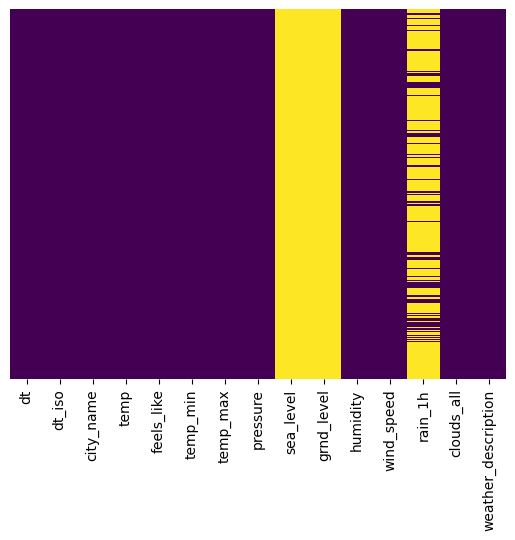

In [8]:
sns.heatmap(meteoDatasets.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
meteoDatasets.nunique()

dt                     13440
dt_iso                 13440
city_name                  1
temp                    2611
feels_like              2872
temp_min                 508
temp_max                 572
pressure                  43
sea_level                  0
grnd_level                 0
humidity                  82
wind_speed               809
rain_1h                  386
clouds_all               101
weather_description        8
dtype: int64

In [10]:
meteoDatasets.drop(['sea_level','grnd_level','city_name'], axis=1,inplace=True)

In [12]:
meteoDatasets['rain_1h'].describe()

count    2641.000000
mean        0.895706
std         1.085090
min         0.100000
25%         0.210000
50%         0.460000
75%         1.090000
max         7.450000
Name: rain_1h, dtype: float64

In [13]:
meteoDatasets['rain_1h'].fillna(0.895706, inplace = True)

<Axes: >

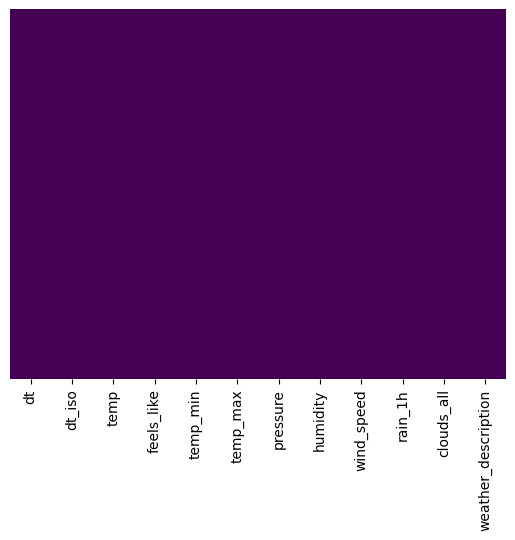

In [16]:
sns.heatmap(meteoDatasets.isnull(),yticklabels=False,cbar=False,cmap='viridis')